| ESCUELA POLITÉCNICA NACIONAL  |                              | Tarea No. |
|-------------------------------|------------------------------|--------------|
| **Metodos Numericos – Computación**     | | **8**        |
| NOMBRE: Ivonne Carolina Ayala |                              |              |


# [Tarea 08] Ejercicios Unidad 03-C mínimos cuadrados

## Conjunto de Ejercicios

#### **1. Datos los datos:**

| \(x_i\) | 4.0 | 4.2 | 4.5 | 4.7 | 5.1 | 5.5 | 5.9 | 6.3 | 6.8 | 7.1 |
|---------|------|------|------|------|------|------|------|------|------|------|
| \(y_i\) | 102.56 | 130.11 | 113.18 | 142.05 | 167.53 | 195.14 | 224.87 | 256.73 | 299.50 | 326.72 |

a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.  
b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.  
c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.  
d. Construya el polinomio por mínimos cuadrados de la forma \( be^{ax} \) y calcule el error.  
e. Construya el polinomio por mínimos cuadrados de la forma \( bx^a \) y calcule el error.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([4.0,4.2,4.5,4.7,5.1,5.5,5.9,6.3,6.8,7.1])
y = np.array([102.56,130.11,113.18,142.05,167.53,195.14,224.87,256.73,
              299.50,326.72])

In [6]:
def error_ss(y, y_hat):
    return np.sum((y - y_hat)**2)

In [7]:
# Polinomio de grado 1
coef1 = np.polyfit(x, y, 1)
y_pred1 = np.polyval(coef1, x)
err1 = error_ss(y, y_pred1)
print("a) Polinomio grado 1:")
print(f"   Ecuación: y = {coef1[0]:.4f}x + {coef1[1]:.4f}")
print(f"   Error: {err1:.4f}\n")


a) Polinomio grado 1:
   Ecuación: y = 71.6102x + -191.5724
   Error: 1058.8389



In [8]:
# Polinomio de grado 2
coef2 = np.polyfit(x, y, 2)
y_pred2 = np.polyval(coef2, x)
err2 = error_ss(y, y_pred2)
print("b) Polinomio grado 2:")
print(f"   Ecuación: y = {coef2[0]:.4f}x² + {coef2[1]:.4f}x + {coef2[2]:.4f}")
print(f"   Error: {err2:.4f}\n")


b) Polinomio grado 2:
   Ecuación: y = 8.2171x² + -19.3086x + 51.0008
   Error: 551.6562



In [9]:
# Polinomio de grado 3
coef3 = np.polyfit(x, y, 3)
y_pred3 = np.polyval(coef3, x)
err3 = error_ss(y, y_pred3)
print("c) Polinomio grado 3:")
print(f"   Ecuación: y = {coef3[0]:.4f}x³ + 
      {coef3[1]:.4f}x² + {coef3[2]:.4f}x + {coef3[3]:.4f}")
print(f"   Error: {err3:.4f}\n")


c) Polinomio grado 3:
   Ecuación: y = -2.6068x³ + 51.5610x² + -254.8748x + 469.1633
   Error: 518.3831



In [10]:
# Ajuste y = b e^{a x}
lny = np.log(y)
coef_exp = np.polyfit(x, lny, 1)
a_exp = coef_exp[0]
lnb_exp = coef_exp[1]
b_exp = np.exp(lnb_exp)
y_pred_exp = b_exp * np.exp(a_exp * x)
err_exp = error_ss(y, y_pred_exp)
print("d) Ajuste exponencial y = b e^{a x}:")
print(f"   a = {a_exp:.4f}, b = {b_exp:.4f}")
print(f"   Ecuación: y = {b_exp:.4f} e^({a_exp:.4f}x)")
print(f"   Error: {err_exp:.4f}\n")


d) Ajuste exponencial y = b e^{a x}:
   a = 0.3685, b = 24.7767
   Ecuación: y = 24.7767 e^(0.3685x)
   Error: 821.0051



In [11]:
# Ajuste y = b x^{a}
lnx = np.log(x)
coef_pow = np.polyfit(lnx, lny, 1)
a_pow = coef_pow[0]
lnb_pow = coef_pow[1]
b_pow = np.exp(lnb_pow)
y_pred_pow = b_pow * x**a_pow
err_pow = error_ss(y, y_pred_pow)
print("e) Ajuste potencial y = b x^{a}:")
print(f"   a = {a_pow:.4f}, b = {b_pow:.4f}")
print(f"   Ecuación: y = {b_pow:.4f} x^{a_pow:.4f}")
print(f"   Error: {err_pow:.4f}\n")


e) Ajuste potencial y = b x^{a}:
   a = 1.9933, b = 6.5187
   Ecuación: y = 6.5187 x^1.9933
   Error: 581.5573



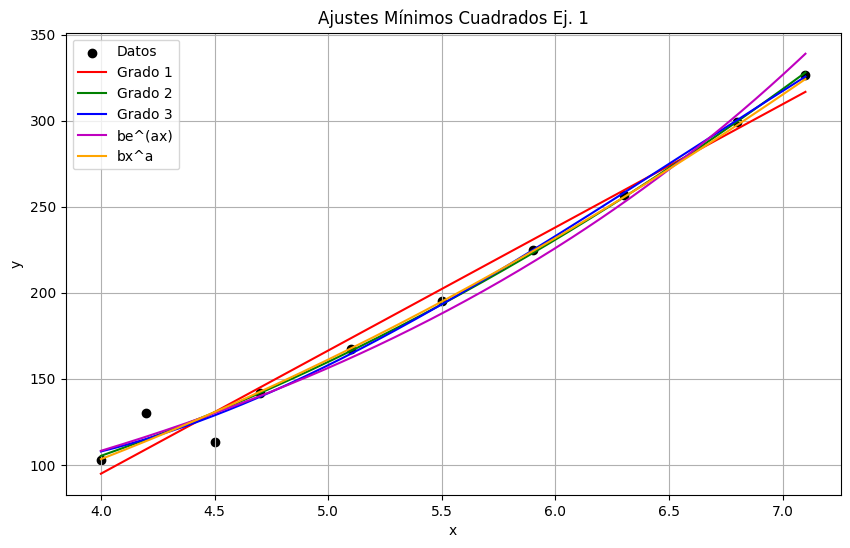

In [12]:
# Gráfico

plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Datos', color='black')

x_plot = np.linspace(min(x), max(x), 200)
plt.plot(x_plot, np.polyval(coef1, x_plot), label=f'Grado 1', color='r')
plt.plot(x_plot, np.polyval(coef2, x_plot), label=f'Grado 2', color='g')
plt.plot(x_plot, np.polyval(coef3, x_plot), label=f'Grado 3', color='b')
plt.plot(x_plot, b_exp*np.exp(a_exp*x_plot), label=f'be^(ax)', color='m')
plt.plot(x_plot, b_pow*(x_plot**a_pow), label=f'bx^a', color='orange')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajustes Mínimos Cuadrados Ej. 1')
plt.legend()
plt.grid(True)
plt.show()


#### **2. Repita el ejercicio 5 para los siguientes datos.**

| \(x_i\) | 0.2 | 0.3 | 0.6 | 0.9 | 1.1 | 1.3 | 1.4 | 1.6 |
|---------|------|------|------|------|------|------|------|------|
| \(y_i\) | 0.050446 | 0.098426 | 0.33277 | 0.72660 | 1.0972 | 1.5697 | 1.8487 | 2.5015 |

---


In [13]:
x2 = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
y2 = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 
               1.8487, 2.5015])


In [14]:
coef1_2 = np.polyfit(x2, y2, 1)
y2_pred1 = np.polyval(coef1_2, x2)
err1_2 = error_ss(y2, y2_pred1)
print("a) Polinomio grado 1:")
print(f"   Ecuación: y = {coef1_2[0]:.4f}x + {coef1_2[1]:.4f}")
print(f"   Error: {err1_2:.4f}\n")


a) Polinomio grado 1:
   Ecuación: y = 1.6655x + -0.5125
   Error: 0.3356



In [16]:
coef2_2 = np.polyfit(x2, y2, 2)
y2_pred2 = np.polyval(coef2_2, x2)
err2_2 = error_ss(y2, y2_pred2)
print("b) Polinomio grado 2:")
print(f"   Ecuación: y = {coef2_2[0]:.4f}x² + 
      {coef2_2[1]:.4f}x + {coef2_2[2]:.4f}")
print(f"   Error: {err2_2:.4f}\n")


b) Polinomio grado 2:
   Ecuación: y = 1.1294x² + -0.3114x + 0.0851
   Error: 0.0024



In [17]:
coef3_2 = np.polyfit(x2, y2, 3)
y2_pred3 = np.polyval(coef3_2, x2)
err3_2 = error_ss(y2, y2_pred3)
print("c) Polinomio grado 3:")
print(f"   Ecuación: y = {coef3_2[0]:.4f}x³ + 
      {coef3_2[1]:.4f}x² + {coef3_2[2]:.4f}x + 
      {coef3_2[3]:.4f}")
print(f"   Error: {err3_2:.4f}\n")


c) Polinomio grado 3:
   Ecuación: y = 0.2662x³ + 0.4029x² + 0.2484x + -0.0184
   Error: 0.0000



In [18]:
lny2 = np.log(y2)
coef_exp2 = np.polyfit(x2, lny2, 1)
a_exp2 = coef_exp2[0]
lnb_exp2 = coef_exp2[1]
b_exp2 = np.exp(lnb_exp2)
y2_pred_exp = b_exp2 * np.exp(a_exp2*x2)
err_exp2 = error_ss(y2, y2_pred_exp)
print("d) Ajuste exponencial y = b e^{a x}:")
print(f"   a = {a_exp2:.4f}, b = {b_exp2:.4f}")
print(f"   Ecuación: y = {b_exp2:.4f} e^({a_exp2:.4f}x)")
print(f"   Error: {err_exp2:.4f}\n")


d) Ajuste exponencial y = b e^{a x}:
   a = 2.7073, b = 0.0457
   Ecuación: y = 0.0457 e^(2.7073x)
   Error: 1.0750



In [19]:
lnx2 = np.log(x2)
coef_pow2 = np.polyfit(lnx2, lny2, 1)
a_pow2 = coef_pow2[0]
lnb_pow2 = coef_pow2[1]
b_pow2 = np.exp(lnb_pow2)
y2_pred_pow = b_pow2*(x2**a_pow2)
err_pow2 = error_ss(y2, y2_pred_pow)
print("e) Ajuste potencial y = b x^{a}:")
print(f"   a = {a_pow2:.4f}, b = {b_pow2:.4f}")
print(f"   Ecuación: y = {b_pow2:.4f} x^{a_pow2:.4f}")
print(f"   Error: {err_pow2:.4f}\n")


e) Ajuste potencial y = b x^{a}:
   a = 1.8720, b = 0.9502
   Ecuación: y = 0.9502 x^1.8720
   Error: 0.0545



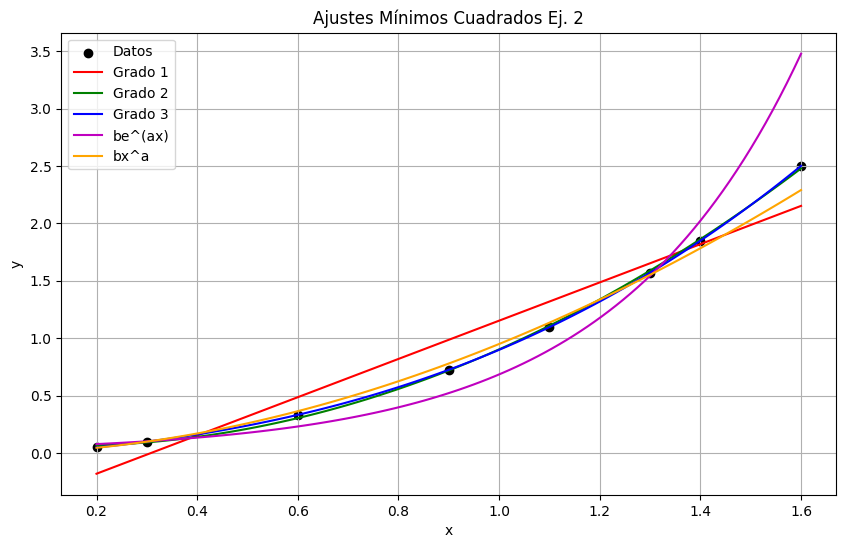

In [20]:
# Gráfico

plt.figure(figsize=(10,6))
plt.scatter(x2, y2, label='Datos', color='black')
x2_plot = np.linspace(min(x2), max(x2), 100)
plt.plot(x2_plot, np.polyval(coef1_2, x2_plot), label=f'Grado 1', color='r')
plt.plot(x2_plot, np.polyval(coef2_2, x2_plot), label=f'Grado 2', color='g')
plt.plot(x2_plot, np.polyval(coef3_2, x2_plot), label=f'Grado 3', color='b')
plt.plot(x2_plot, b_exp2*np.exp(a_exp2*x2_plot), label=f'be^(ax)', color='m')
plt.plot(x2_plot, b_pow2*(x2_plot**a_pow2), label=f'bx^a', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajustes Mínimos Cuadrados Ej. 2')
plt.legend()
plt.grid(True)
plt.show()


#### **3.** La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos.

| **Puntuación ACT** | **Promedio de puntos** | **Puntuación ACT** | **Promedio de puntos** |
|--------------------|------------------------|--------------------|------------------------|
| 28                | 3.84                  | 29                | 3.75                  |
| 25                | 3.21                  | 28                | 3.65                  |
| 28                | 3.23                  | 27                | 3.87                  |
| 27                | 3.63                  | 29                | 3.75                  |
| 28                | 3.75                  | 21                | 1.66                  |
| 33                | 3.20                  | 28                | 3.12                  |
| 28                | 3.41                  | 28                | 2.96                  |
| 29                | 3.38                  | 26                | 2.92                  |
| 23                | 3.53                  | 30                | 3.10                  |
| 27                | 2.03                  | 24                | 2.81                  |


Ajuste lineal:
   Ecuación: y = 0.1009x + 0.4866
   Error: 5.0487



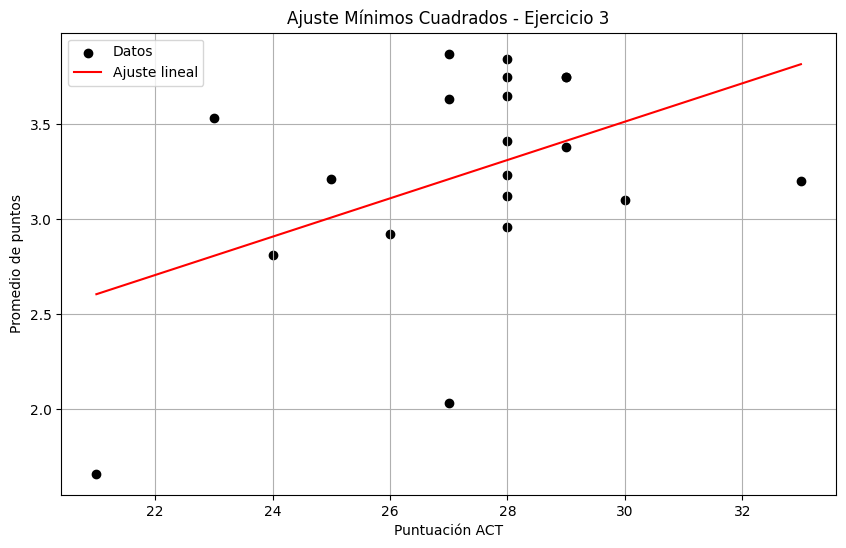

In [21]:
x_act = np.array([28, 25, 28, 27, 28, 33, 28, 29, 23, 27,
                  29, 28, 27, 29, 21, 28, 28, 26, 30, 24])
y_prom = np.array([3.84,3.21,3.23,3.63,3.75,3.20,3.41,3.38,3.53,2.03,
                   3.75,3.65,3.87,3.75,1.66,3.12,2.96,2.92,3.10,2.81])

coef_lin_3 = np.polyfit(x_act, y_prom, 1)
y_pred_3 = np.polyval(coef_lin_3, x_act)
err_3 = error_ss(y_prom, y_pred_3)

print("Ajuste lineal:")
print(f"   Ecuación: y = {coef_lin_3[0]:.4f}x + {coef_lin_3[1]:.4f}")
print(f"   Error: {err_3:.4f}\n")

plt.figure(figsize=(10,6))
plt.scatter(x_act, y_prom, label='Datos', color='black')
x_plot_3 = np.linspace(min(x_act), max(x_act), 100)
plt.plot(x_plot_3, np.polyval(coef_lin_3, x_plot_3), 
         label='Ajuste lineal', color='r')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Ajuste Mínimos Cuadrados - Ejercicio 3')
plt.legend()
plt.grid(True)
plt.show()

#### **4.** El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las características comparativas de supervivencia durante un choque de automóviles de diferentes clases. Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muestra el porcentaje de vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria).

| **Tipo**                           | **Peso promedio** | **Porcentaje de presentación** |
|------------------------------------|-------------------|--------------------------------|
| 1. Regular lujoso doméstico        | 4800 lb           | 3.1                            |
| 2. Regular intermediario doméstico | 3700 lb           | 4.0                            |
| 3. Regular económico doméstico     | 3400 lb           | 5.2                            |
| 4. Compacto doméstico              | 2800 lb           | 6.4                            |
| 5. Compacto extranjero        | 1900 lb           | 9.6                            |

Ajuste lineal:
   Ecuación: y = -0.0023x + 13.1465
   Error: 2.0591



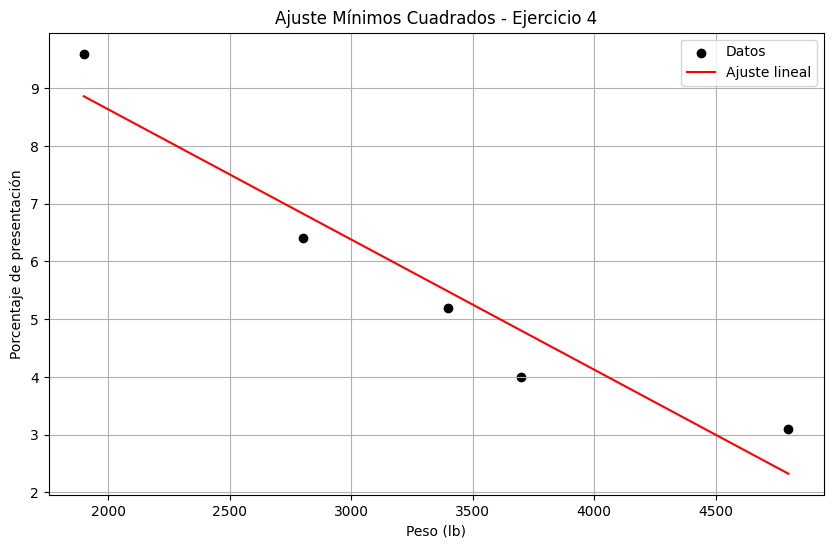

In [22]:
x_peso = np.array([4800, 3700, 3400, 2800, 1900])
y_porcentaje = np.array([3.1, 4.0, 5.2, 6.4, 9.6])

coef_lin_4 = np.polyfit(x_peso, y_porcentaje, 1)
y_pred_4 = np.polyval(coef_lin_4, x_peso)
err_4 = error_ss(y_porcentaje, y_pred_4)

print("Ajuste lineal:")
print(f"   Ecuación: y = {coef_lin_4[0]:.4f}x + {coef_lin_4[1]:.4f}")
print(f"   Error: {err_4:.4f}\n")

plt.figure(figsize=(10,6))
plt.scatter(x_peso, y_porcentaje, label='Datos', color='black')
x_plot_4 = np.linspace(min(x_peso), max(x_peso), 100)
plt.plot(x_plot_4, np.polyval(coef_lin_4, x_plot_4), 
         label='Ajuste lineal', color='r')
plt.xlabel('Peso (lb)')
plt.ylabel('Porcentaje de presentación')
plt.title('Ajuste Mínimos Cuadrados - Ejercicio 4')
plt.legend()
plt.grid(True)
plt.show()

**Declaración de uso de IA**

En la preparación de este contenido, se utilizó ChatGPT para generar las instrucciones de los ejercicios, comprender el código, realizar correcciones y asistir en la presentación de las gráficas, con el objetivo de optimizar el proceso de elaboración y mantener la responsabilidad del producto final en el criterio del autor.

